In [49]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))
sys.path.append(os.path.abspath(os.path.join('../..')))

In [50]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

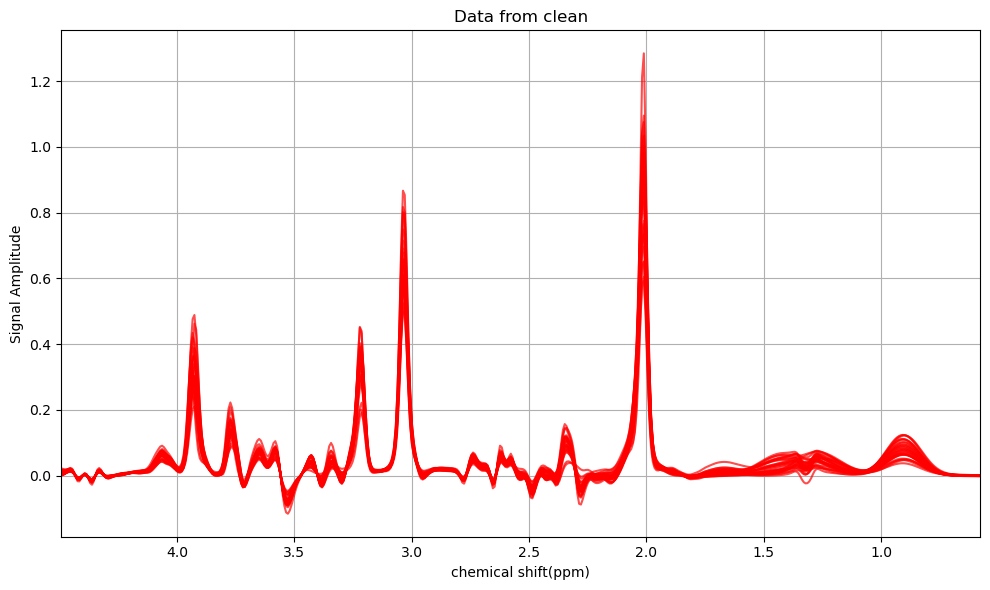

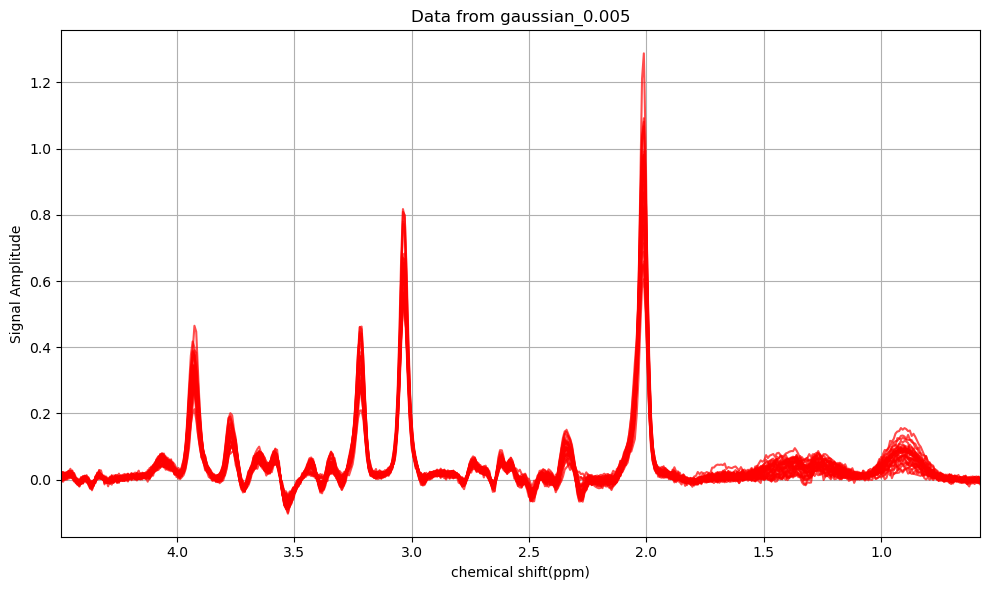

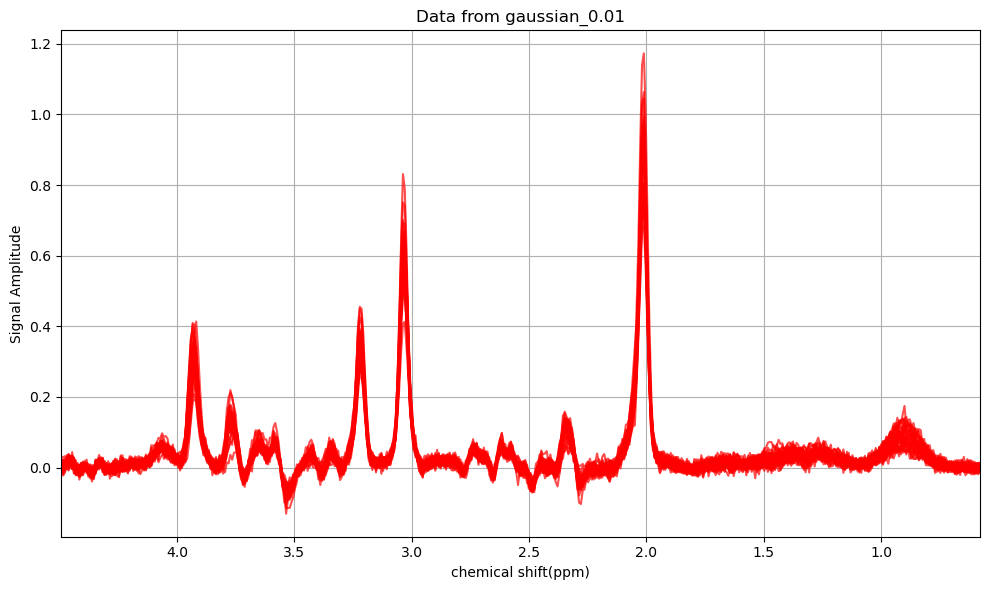

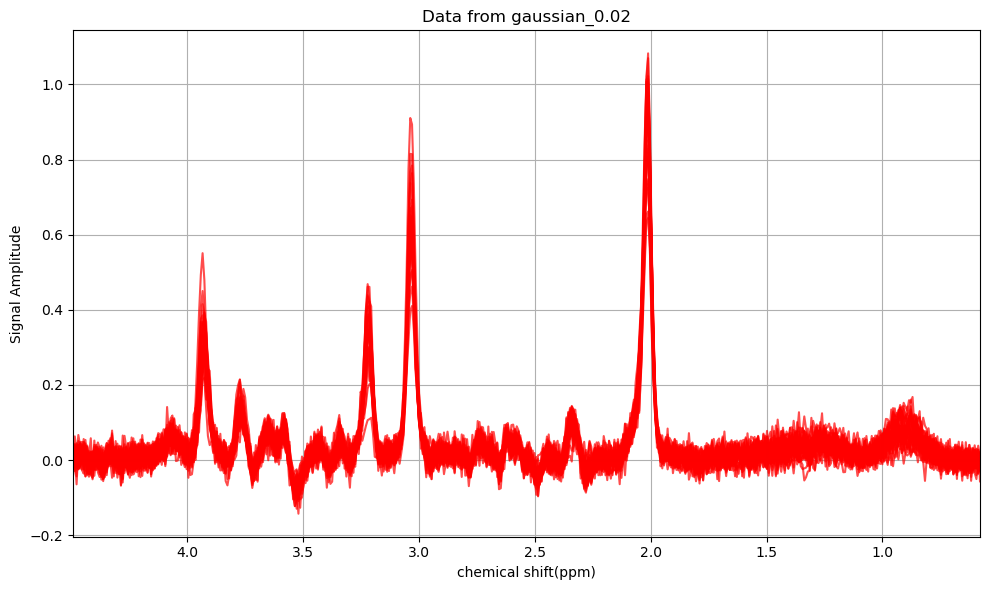

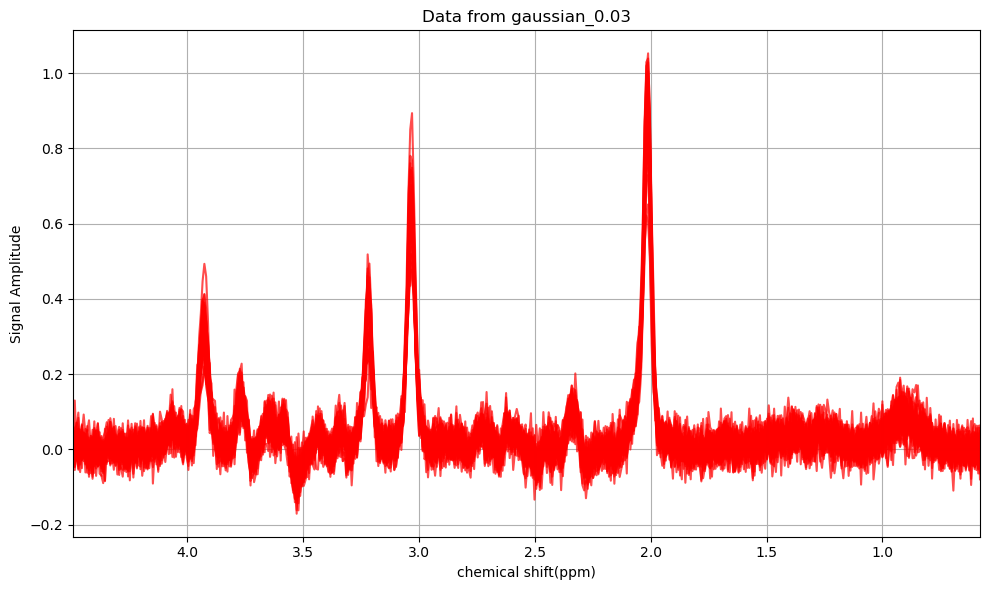

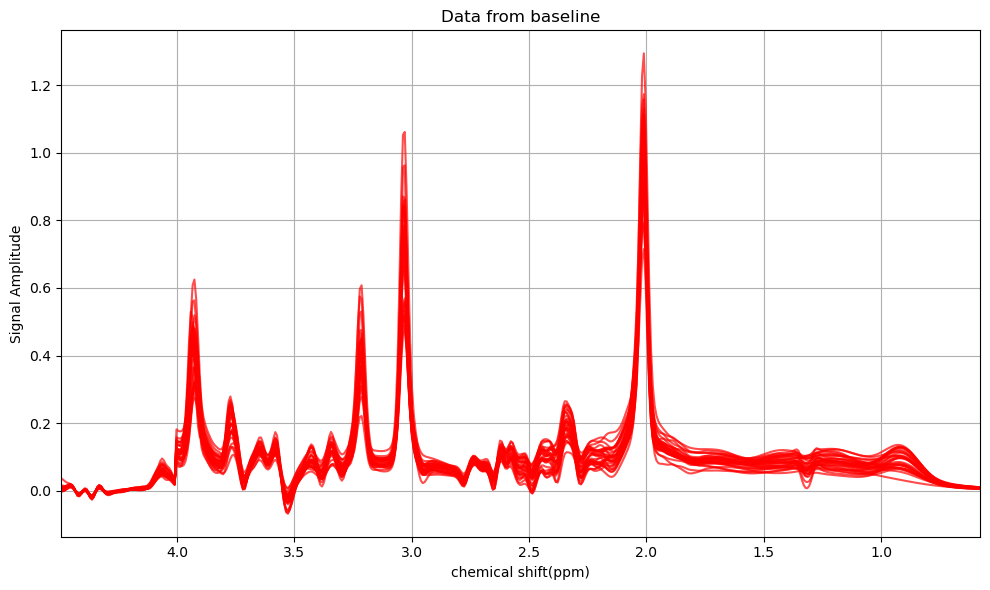

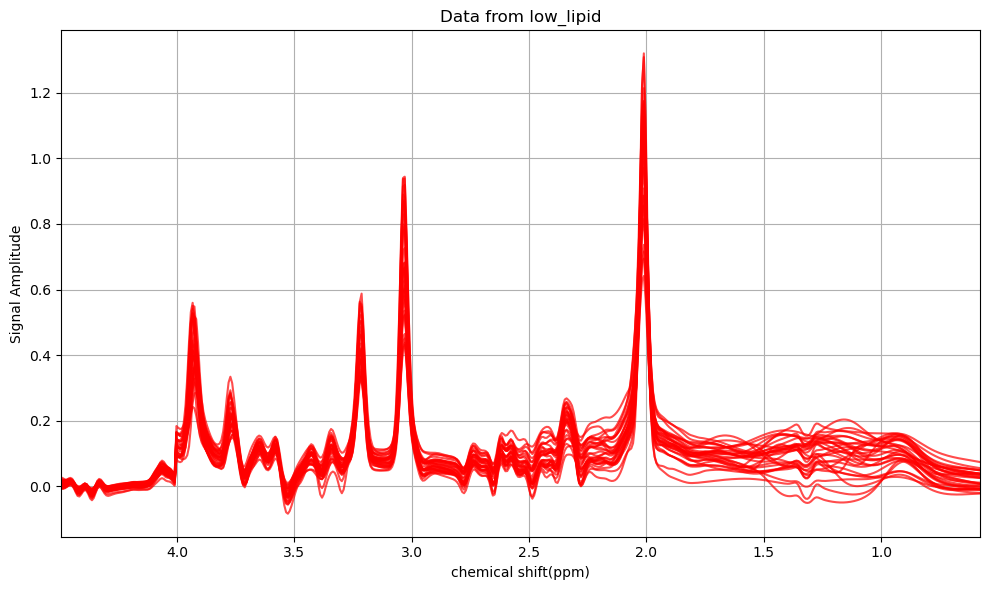

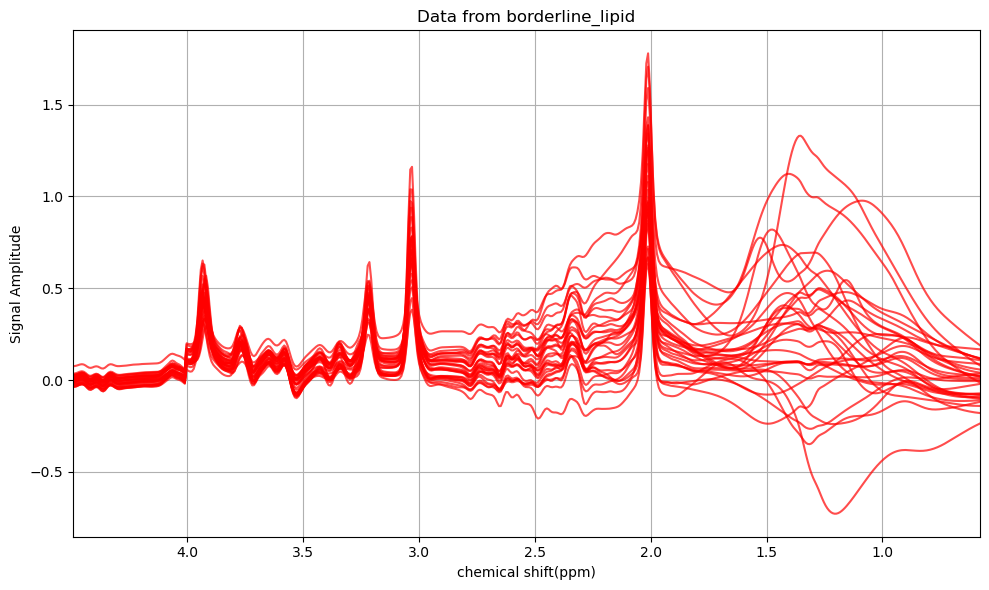

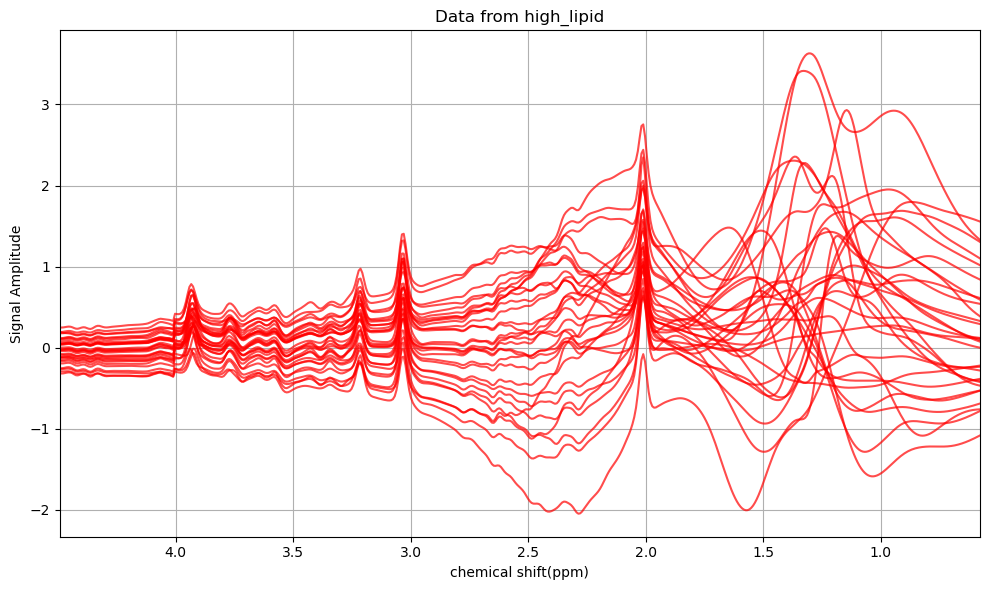

In [51]:
# Plot perturbed data
ppm_min = 0.578848480483455
ppm_max = 4.49271535465395
num_points = 512
x_axis = np.linspace(ppm_min, ppm_max, num_points)

folder_path = '../data/perturb'
for fn in os.listdir(folder_path):
    if fn.endswith('.npy'):
        file_path = os.path.join(folder_path, fn)
        data = np.load(file_path)

        plt.figure(figsize=(10, 6))
        plt.title(f'Data from {fn[:-4]}')
        
        # Plot each sample in the batch (assuming first dimension is batch and second is data)
        for i in range(data.shape[0]):  # Loop over the batch size (b)
            plt.plot(x_axis, data[i], alpha=0.7, color='red')  # Plot each sample
        
        plt.xlabel('chemical shift(ppm)')
        plt.xlim(ppm_min, ppm_max)
        plt.gca().invert_xaxis()
        plt.ylabel('Signal Amplitude')
        plt.grid(True)
        plt.tight_layout()
        plt.show()  # Display the plot

In [52]:
# model_name = 'lpn_mrs_h_30_k_3_n_(0.01_0.01)'
model_name = 'lpn_cond_mrs_h_30_k_3_n_(0.001_0.1)'
prior = pd.read_csv(f'../savings/{model_name}/prior/prior.csv')
p_0 = np.mean(prior['baseline'].values)
p_1 = np.mean(prior['low_lipid'].values)
# p_0 = np.mean(prior['gaussian_0'].values)
# p_1 = np.mean(prior['gaussian_0.01'].values)

prior_normalized = prior.copy()
prior_normalized = (prior_normalized - p_0) / (p_1 - p_0)

In [53]:
prior_normalized.head()

,clean,gaussian_0.005,gaussian_0.01,gaussian_0.02,gaussian_0.03,baseline,low_lipid,borderline_lipid,high_lipid
0,27.482437,17.411218,16.555545,15.189141,27.383867,0.029533,0.160801,16.591168,1.351029e+05
1,11.770395,13.216890,15.739663,24.514555,30.434958,-0.105088,0.331813,3.120734,2.272213e+06
2,15.417467,15.782910,16.723350,15.643736,32.052967,-0.068158,0.080593,4.225949,7.175196e+05
3,17.805035,13.936004,16.949373,16.561972,51.915200,-0.120669,1.068761,13.733406,1.724832e+05
4,19.759433,9.786765,15.870860,14.706055,30.316504,-0.078192,-0.133144,5672.406100,6.357988e+04


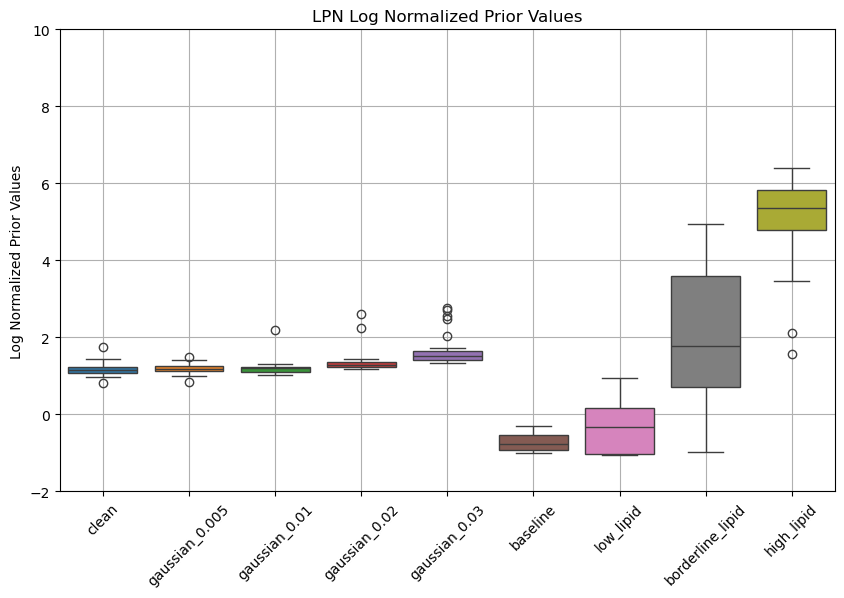

In [54]:
min_normalized_prior = prior_normalized['baseline'].values.min()
# min_normalized_prior = prior_normalized['gaussian_0'].values.min()
plt.figure(figsize=(10, 6))
sns.boxplot(data=np.log10(prior_normalized - min_normalized_prior +1e-1))
# plt.title(f'{model_name} - Log Normalized Prior Values')
plt.title(f'LPN Log Normalized Prior Values')
plt.ylabel('Log Normalized Prior Values')
plt.ylim((-2,10))
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig(f'../savings/{model_name}/prior.pdf', format='pdf')
plt.show()

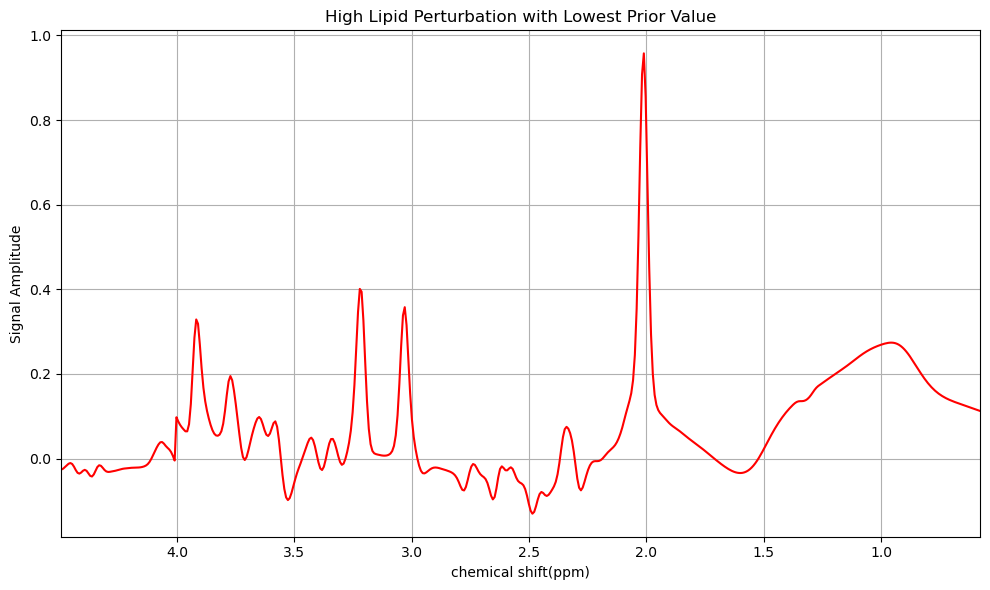

In [55]:
min_id = prior['high_lipid'].values.argmin()
high_lipid = np.load(f'../data/perturb/high_lipid.npy')
plt.figure(figsize=(10, 6))
plt.plot(x_axis, high_lipid[min_id], color='red')
plt.title(f'High Lipid Perturbation with Lowest Prior Value')
plt.xlabel('chemical shift(ppm)')
plt.xlim(ppm_min, ppm_max)
plt.gca().invert_xaxis()
plt.ylabel('Signal Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()